# 11. Further Issues in Using OLS with Time Series Data

In [1]:
%pip install matplotlib numpy pandas statsmodels wooldridge scipy -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import wooldridge as wool
from scipy import stats

## 11.1 Asymptotics with Time Seires

### Example 11.4: Efficient Markets Hypothesis

In [3]:
nyse = wool.data("nyse")
nyse["ret"] = nyse["return"]

# add all lags up to order 3:
nyse["ret_lag1"] = nyse["ret"].shift(1)
nyse["ret_lag2"] = nyse["ret"].shift(2)
nyse["ret_lag3"] = nyse["ret"].shift(3)

# linear regression of model with lags:
reg1 = smf.ols(formula="ret ~ ret_lag1", data=nyse)
reg2 = smf.ols(formula="ret ~ ret_lag1 + ret_lag2", data=nyse)
reg3 = smf.ols(formula="ret ~ ret_lag1 + ret_lag2 + ret_lag3", data=nyse)
results1 = reg1.fit()
results2 = reg2.fit()
results3 = reg3.fit()

# print regression tables:
table1 = pd.DataFrame(
    {
        "b": round(results1.params, 4),
        "se": round(results1.bse, 4),
        "t": round(results1.tvalues, 4),
        "pval": round(results1.pvalues, 4),
    },
)
print(f"table1: \n{table1}\n")

table1: 
                b      se       t    pval
Intercept  0.1796  0.0807  2.2248  0.0264
ret_lag1   0.0589  0.0380  1.5490  0.1218



In [4]:
table2 = pd.DataFrame(
    {
        "b": round(results2.params, 4),
        "se": round(results2.bse, 4),
        "t": round(results2.tvalues, 4),
        "pval": round(results2.pvalues, 4),
    },
)
print(f"table2: \n{table2}\n")

table2: 
                b      se       t    pval
Intercept  0.1857  0.0812  2.2889  0.0224
ret_lag1   0.0603  0.0382  1.5799  0.1146
ret_lag2  -0.0381  0.0381 -0.9982  0.3185



In [5]:
table3 = pd.DataFrame(
    {
        "b": round(results3.params, 4),
        "se": round(results3.bse, 4),
        "t": round(results3.tvalues, 4),
        "pval": round(results3.pvalues, 4),
    },
)
print(f"table3: \n{table3}\n")

table3: 
                b      se       t    pval
Intercept  0.1794  0.0816  2.1990  0.0282
ret_lag1   0.0614  0.0382  1.6056  0.1088
ret_lag2  -0.0403  0.0383 -1.0519  0.2932
ret_lag3   0.0307  0.0382  0.8038  0.4218



## 11.2 The Nature of Highly Persistent Time Series

Text(0.5, 0, 'time')

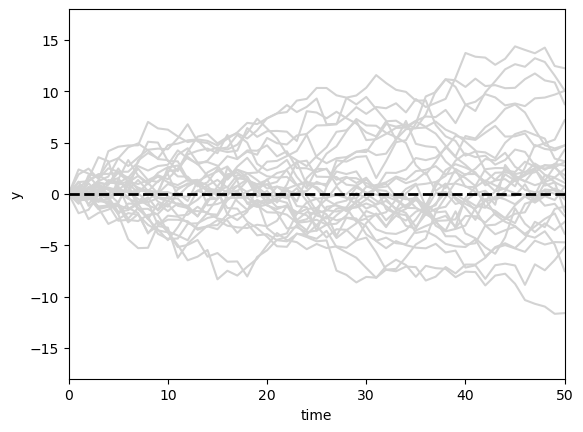

In [6]:
# set the random seed:
np.random.seed(1234567)

# initialize plot:
x_range = np.linspace(0, 50, num=51)
plt.ylim([-18, 18])
plt.xlim([0, 50])

# loop over draws:
for r in range(30):
    # i.i.d. standard normal shock:
    e = stats.norm.rvs(0, 1, size=51)

    # set first entry to 0 (gives y_0 = 0):
    e[0] = 0

    # random walk as cumulative sum of shocks:
    y = np.cumsum(e)

    # add line to graph:
    plt.plot(x_range, y, color="lightgrey", linestyle="-")

plt.axhline(linewidth=2, linestyle="--", color="black")
plt.ylabel("y")
plt.xlabel("time")

Text(0.5, 0, 'time')

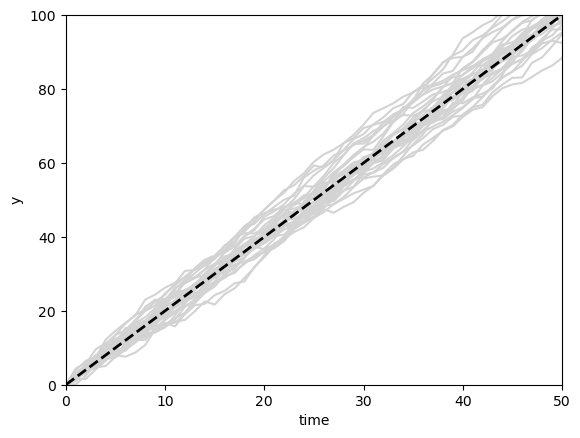

In [7]:
# set the random seed:
np.random.seed(1234567)

# initialize plot:
x_range = np.linspace(0, 50, num=51)
plt.ylim([0, 100])
plt.xlim([0, 50])

# loop over draws:
for r in range(30):
    # i.i.d. standard normal shock:
    e = stats.norm.rvs(0, 1, size=51)

    # set first entry to 0 (gives y_0 = 0):
    e[0] = 0

    # random walk as cumulative sum of shocks plus drift:
    y = np.cumsum(e) + 2 * x_range

    # add line to graph:
    plt.plot(x_range, y, color="lightgrey", linestyle="-")

plt.plot(x_range, 2 * x_range, linewidth=2, linestyle="--", color="black")
plt.ylabel("y")
plt.xlabel("time")

## 11.3 Differences of Highly Persistent Time Series

Text(0.5, 0, 'time')

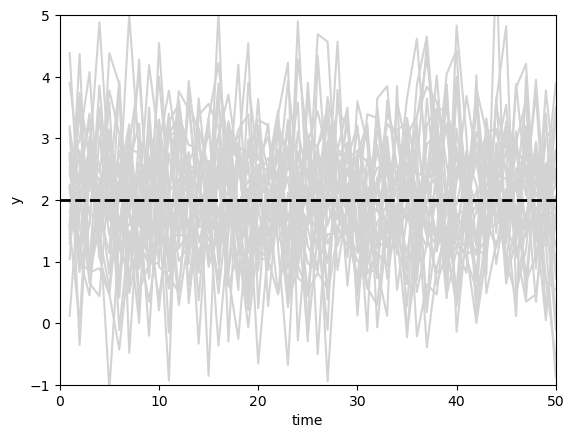

In [8]:
# set the random seed:
np.random.seed(1234567)

# initialize plot:
x_range = np.linspace(1, 50, num=50)
plt.ylim([-1, 5])
plt.xlim([0, 50])

# loop over draws:
for r in range(30):
    # i.i.d. standard normal shock and cumulative sum of shocks:
    e = stats.norm.rvs(0, 1, size=51)
    e[0] = 0
    y = np.cumsum(2 + e)

    # first difference:
    Dy = y[1:51] - y[0:50]

    # add line to graph:
    plt.plot(x_range, Dy, color="lightgrey", linestyle="-")

plt.axhline(y=2, linewidth=2, linestyle="--", color="black")
plt.ylabel("y")
plt.xlabel("time")

## 11.4 Regression with First Differences

### Example 11.6: Fertility Equation

In [9]:
fertil3 = wool.data("fertil3")
T = len(fertil3)

# define time series (years only) beginning in 1913:
fertil3.index = pd.date_range(start="1913", periods=T, freq="YE").year

# compute first differences:
fertil3["gfr_diff1"] = fertil3["gfr"].diff()
fertil3["pe_diff1"] = fertil3["pe"].diff()
print(f"fertil3.head(): \n{fertil3.head()}\n")

fertil3.head(): 
             gfr     pe  year  t  tsq  pe_1  pe_2  pe_3  pe_4  pill  ...  \
1913  124.699997   0.00  1913  1    1   NaN   NaN   NaN   NaN     0  ...   
1914  126.599998   0.00  1914  2    4   0.0   NaN   NaN   NaN     0  ...   
1915  125.000000   0.00  1915  3    9   0.0   0.0   NaN   NaN     0  ...   
1916  123.400002   0.00  1916  4   16   0.0   0.0   0.0   NaN     0  ...   
1917  121.000000  19.27  1917  5   25   0.0   0.0   0.0   0.0     0  ...   

      cpe_3  cpe_4       gfr_1    cgfr_1    cgfr_2    cgfr_3  cgfr_4  \
1913    NaN    NaN         NaN       NaN       NaN       NaN     NaN   
1914    NaN    NaN  124.699997       NaN       NaN       NaN     NaN   
1915    NaN    NaN  126.599998  1.900002       NaN       NaN     NaN   
1916    NaN    NaN  125.000000 -1.599998  1.900002       NaN     NaN   
1917    0.0    NaN  123.400002 -1.599998 -1.599998  1.900002     NaN   

           gfr_2  gfr_diff1  pe_diff1  
1913         NaN        NaN       NaN  
1914         

In [10]:
# linear regression of model with first differences:
reg1 = smf.ols(formula="gfr_diff1 ~ pe_diff1", data=fertil3)
results1 = reg1.fit()

# print regression table:
table1 = pd.DataFrame(
    {
        "b": round(results1.params, 4),
        "se": round(results1.bse, 4),
        "t": round(results1.tvalues, 4),
        "pval": round(results1.pvalues, 4),
    },
)
print(f"table1: \n{table1}\n")

table1: 
                b      se       t    pval
Intercept -0.7848  0.5020 -1.5632  0.1226
pe_diff1  -0.0427  0.0284 -1.5045  0.1370



In [11]:
# linear regression of model with lagged differences:
fertil3["pe_diff1_lag1"] = fertil3["pe_diff1"].shift(1)
fertil3["pe_diff1_lag2"] = fertil3["pe_diff1"].shift(2)

reg2 = smf.ols(
    formula="gfr_diff1 ~ pe_diff1 + pe_diff1_lag1 + pe_diff1_lag2",
    data=fertil3,
)
results2 = reg2.fit()

# print regression table:
table2 = pd.DataFrame(
    {
        "b": round(results2.params, 4),
        "se": round(results2.bse, 4),
        "t": round(results2.tvalues, 4),
        "pval": round(results2.pvalues, 4),
    },
)
print(f"table2: \n{table2}\n")

table2: 
                    b      se       t    pval
Intercept     -0.9637  0.4678 -2.0602  0.0434
pe_diff1      -0.0362  0.0268 -1.3522  0.1810
pe_diff1_lag1 -0.0140  0.0276 -0.5070  0.6139
pe_diff1_lag2  0.1100  0.0269  4.0919  0.0001

